<a href="https://colab.research.google.com/github/ob6854w/Appliances-Energy-Prediction/blob/master/Planet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle --upgrade

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.8)


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"ob6854w","key":"e1c1dcba33b339d8d1e30b1502d9c881"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c planet-understanding-the-amazon-from-space

planet-understanding-the-amazon-from-space.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
!ls

 drive
'kaggle (1).json'
'kaggle (2).json'
 kaggle.json
 Kaggle-planet-test-tif.torrent
 Kaggle-planet-train-tif.torrent
 planet-understanding-the-amazon-from-space.zip
 sample_data
 sample_submission_v2.csv
 test_v2_file_mapping.csv
 train_v2.csv


In [6]:
from zipfile import ZipFile
file_name ="planet-understanding-the-amazon-from-space.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [7]:
!ls

 drive
'kaggle (1).json'
'kaggle (2).json'
 kaggle.json
 Kaggle-planet-test-tif.torrent
 Kaggle-planet-train-tif.torrent
 planet-understanding-the-amazon-from-space.zip
 sample_data
 sample_submission_v2.csv
 test_v2_file_mapping.csv
 train_v2.csv


In [8]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images,test_labels)= mnist.load_data()

In [9]:
print("Training data: {}, {}".format(train_images.shape, train_labels.shape))
print("Test data: {}, {}".format(test_images.shape, test_labels.shape))
class_labels = np.unique(train_labels)
print("There are {} classes in the dataset. They are:{}".format(len(class_labels), class_labels))

Training data: (60000, 28, 28), (60000,)
Test data: (10000, 28, 28), (10000,)
There are 10 classes in the dataset. They are:[0 1 2 3 4 5 6 7 8 9]


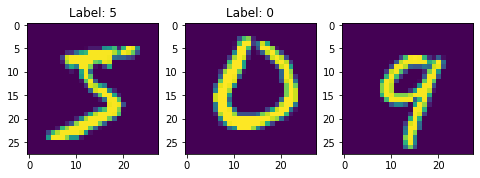

In [10]:
plt.figure(figsize=(8, 5))

plt.subplot(1,3,1)
plt.imshow(train_images[0])
plt.title("Label: {}".format(train_labels[0]))

plt.subplot(1,3,2)
plt.imshow(train_images[2500])
plt.title("Label: {}".format(train_labels[2500]))

plt.subplot(1,3,3)
plt.imshow(test_images[12])

plt.show()

In [11]:
#Scale
train_images = train_images/255.0
test_images = test_images/255.0

In [12]:
# Split training data to training and validation sets
x_train = train_images[0:50000]
x_val = train_images[50000:]
y_train = train_labels[0:50000]
y_val = train_labels[50000:]

In [13]:
print("x_train: {}".format(x_train.shape))  # prints x_train: (50000, 28, 28)
print("x_val: {}".format(x_val.shape)) # prints x_val: (10000, 28, 28)
print("y_train: {}".format(y_train.shape)) # prints y_train: (50000,)
print("y_val: {}".format(y_val.shape)) # prints y_val: (10000,)

x_train: (50000, 28, 28)
x_val: (10000, 28, 28)
y_train: (50000,)
y_val: (10000,)


In [14]:
# Reshape data from 28 * 28 array to a single array
new_dimension = np.prod(train_images.shape[1:])
x_train = x_train.reshape(x_train.shape[0], new_dimension)
x_val = x_val.reshape(x_val.shape[0], new_dimension)
test_images = test_images.reshape(test_images.shape[0], new_dimension)

In [15]:
print("x_train: {}".format(x_train.shape)) #prints x_train: (50000,784)
print("x_val: {}".format(x_val.shape)) #prints x_val: (10000,784)
print("test_images: {}".format(test_images.shape)) #prints test_images: (10000, 784)

x_train: (50000, 784)
x_val: (10000, 784)
test_images: (10000, 784)


In [16]:
#Encode labels to categorical variables
from tensorflow.keras.utils import to_categorical
no_labels = 10
y_train = to_categorical(y_train, no_labels)
y_val = to_categorical(y_val, no_labels)
y_test = to_categorical(test_labels, no_labels)

In [17]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [18]:
# Activation functions and Neural Networks Hyperparameters
#placeholders are not enabled in tf 2
X = tf.placeholder(tf.float32, [None, new_dimension])
Y = tf.placeholder(tf.float32, [None, no_labels])

In [19]:
# create model architecture
def multilayer_perceptron(x, no_classes, first_layer_neurons=256, second_layer_neurons=128):
  #first layer
  first_weight = tf.Variable(tf.random_uniform([new_dimension, first_layer_neurons]))
  first_bias = tf.Variable(tf.zeros([first_layer_neurons]))
  first_layer_output = tf.nn.relu(tf.add(tf.matmul(x, first_weight), first_bias))
  # second layer
  second_weight = tf.Variable(tf.random_uniform([first_layer_neurons, second_layer_neurons]))
  second_bias = tf.Variable(tf.zeros([second_layer_neurons]))
  second_layer_output =tf.nn.relu(tf.add(tf.matmul(first_layer_output, second_weight), second_bias))
  # output layer
  final_weight = tf.Variable(tf.random_uniform([second_layer_neurons, no_classes]))
  final_bias = tf.Variable(tf.zeros([no_classes]))
  logits = tf.add(tf.matmul(second_layer_output, final_weight), final_bias)

  return logits

logits = multilayer_perceptron(X, no_labels)
 

In [20]:
learning_rate =0.01
# we define the loss and optimiser for the network
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimiser = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimiser.minimize(loss_op)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [21]:
# initialise the variables
init = tf.global_variables_initializer()

In [22]:
epochs = 20
batch_size = 1000
iteration = len(x_train) // batch_size

In [28]:
# train model
with tf.Session() as session:
  session.run(init)
  for epoch in range(epochs):
    average_cost = 0
    start, end = 0, batch_size
    for i in range(iteration):
      batch_x, batch_y = x_train[start: end], y_train[start: end]
      _, loss = session.run([train_op, loss_op], feed_dict = {X: batch_x, Y: batch_y})
      start += batch_size
      end += batch_size
      #average loss
      average_cost += loss/iteration
    print("Epoch========{}".format(epoch))
  # evaluate model
  prediction = tf.nn.softmax(logits)
  ground_truth = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
  accuracy = tf.reduce_mean(tf.cast(ground_truth, "float"))
  print("Accuracy: {}".format(accuracy.eval({X: test_images, Y: y_test})))
 

Epoch========0
Epoch========1
Epoch========2
Epoch========3
Epoch========4
Epoch========5
Epoch========6
Epoch========7
Epoch========8
Epoch========9
Epoch========10
Epoch========11
Epoch========12
Epoch========13
Epoch========14
Epoch========15
Epoch========16
Epoch========17
Epoch========18
Epoch========19
Accuracy: 0.9150000214576721


**Regularization and Optimisation for deep learning**

In [24]:
# Building a Sequential feed forward Network in Keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [25]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(new_dimension,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(no_labels, activation='softmax'))

In [26]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20,batch_size=1000)
test_loss, test_accuracy = model.evaluate(test_images, y_test)
print('Test loss: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_accuracy))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
49000/50000 [============================>.] - ETA: 0s - loss: 0.6842 - acc: 0.8160WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training_v1.py:2048: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
50000/50000 [==============================] - 1s 29us/sample - loss: 0.6769 - acc: 0.8179 - val_loss: 0.2720 - val_acc: 0.9233
Epoch 2/20
50000/50000 [==============================] - 1s 28us/sample - loss: 0.2387 - acc: 0.9302 - val_loss: 0.1920 - val_acc: 0.9460
Epoch 3/20
50000/50000 [==============================] - 1s 28us/sample - loss: 0.1748 - acc: 0.9496 - val_loss: 0.1553 - val_acc: 0.9563
Epoch 4/20
50000/50000 [==============================] - 1s 28us/sample - loss: 0.1395 - acc: 0

Text(0.5, 1.0, 'Loss Curves- before regularisation')

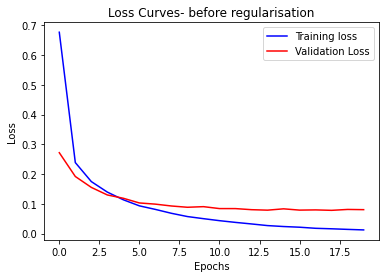

In [27]:
#Check for overfitting
plt.figure()
plt.plot(history.history['loss'], 'blue')
plt.plot(history.history['val_loss'], 'red')
plt.legend(['Training loss','Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves- before regularisation')

In [29]:
#Although the validation and training loss seem great, we can see that the validation #loss increases. This identifies overfitting in 
# our network. How do we proceed? #Introduce regularization to the model
from tensorflow.keras.layers import Dropout
reg_model = Sequential()
reg_model.add(Dense(256, activation='relu', input_shape=(new_dimension,)))
reg_model.add(Dropout(0.4))
reg_model.add(Dense(128, activation='relu'))
reg_model.add(Dropout(0.4))
reg_model.add(Dense(no_labels, activation='softmax'))

In [30]:
reg_model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [31]:
reg_history = reg_model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=1000)
test_loss, test_accuracy = reg_model.evaluate(test_images, y_test)
print('Test loss: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_accuracy))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 3s 54us/sample - loss: 0.9766 - acc: 0.6891 - val_loss: 0.2892 - val_acc: 0.9164
Epoch 2/20
50000/50000 [==============================] - 2s 34us/sample - loss: 0.3734 - acc: 0.8898 - val_loss: 0.1965 - val_acc: 0.9439
Epoch 3/20
50000/50000 [==============================] - 2s 34us/sample - loss: 0.2824 - acc: 0.9177 - val_loss: 0.1576 - val_acc: 0.9543
Epoch 4/20
50000/50000 [==============================] - 2s 34us/sample - loss: 0.2301 - acc: 0.9325 - val_loss: 0.1375 - val_acc: 0.9602
Epoch 5/20
50000/50000 [==============================] - 2s 35us/sample - loss: 0.1975 - acc: 0.9417 - val_loss: 0.1197 - val_acc: 0.9660
Epoch 6/20
50000/50000 [==============================] - 2s 34us/sample - loss: 0.1793 - acc: 0.9483 - val_loss: 0.1097 - val_acc: 0.9688
Epoch 7/20
50000/50000 [==============================] - 2s 35us/sample - loss: 0.1590 - acc: 0.9533 - val_loss: 0.

Text(0.5, 1.0, 'Loss Curves - after regularization')

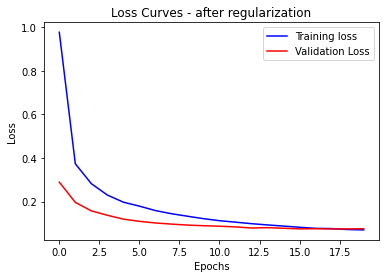

In [32]:
# Check for overfitting
plt.figure()
plt.plot(reg_history.history['loss'], 'blue')
plt.plot(reg_history.history['val_loss'], 'red')
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves - after regularization')